Хеадер

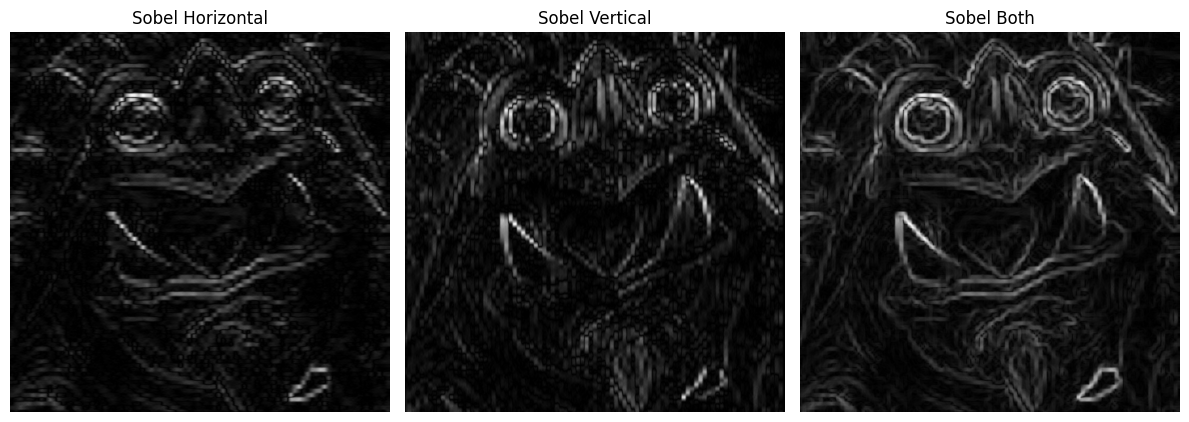

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image

def sobel_filter(img, k_size, mode='vertical'):

    # преобразуем изображение в массив numpy
    img = np.asarray(img).astype(np.float32)

    # если цветное изображение — преобразуем в градации серого
    if img.ndim == 3 and img.shape[2] > 1:
        img = 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]

    # проверка допустимых размеров фильтра
    assert k_size in [3, 5], "k_size должен быть 3 или 5"

    # фильтры Собеля
    if k_size == 3:
        kh = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
        kv = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1, -2, -1]], dtype=np.float32)
    else:
        kh = np.array([[-1, -2, 0, 2, 1],
                       [-4, -8, 0, 8, 4],
                       [-6, -12, 0, 12, 6],
                       [-4, -8, 0, 8, 4],
                       [-1, -2, 0, 2, 1]], dtype=np.float32)
        kv = np.array([[1, 4, 6, 4, 1],
                       [2, 8, 12, 8, 2],
                       [0, 0, 0, 0, 0],
                       [-2, -8, -12, -8, -2],
                       [-1, -4, -6, -4, -1]], dtype=np.float32)
        
    gx = signal.convolve2d(img, kh, mode='same', boundary='symm')
    gy = signal.convolve2d(img, kv, mode='same', boundary='symm')

    # применение фильтра
    if mode == 'vertical':
        g = np.abs(gx)
    elif mode == 'horizontal':
        g = np.abs(gy)
    elif mode == 'both':
        g = np.sqrt(gx ** 2 + gy ** 2)
    else:
        raise ValueError('unknown mode')

    # нормализация результата
    g *= 255.0 / np.max(g)

    return g.astype(np.uint8)

# Загрузка изображения
img = Image.open('jij.jfif')

# Применение фильтра
result_horizontal = sobel_filter(img, k_size=5, mode='horizontal')
result_vertical = sobel_filter(img, k_size=5, mode='vertical')
result_combined = sobel_filter(img, k_size=5, mode='both')


# Отображение
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].imshow(result_horizontal, cmap='gray')
axes[0].set_title('Sobel Horizontal')
axes[0].axis('off')

axes[1].imshow(result_vertical, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].axis('off')

axes[2].imshow(result_combined, cmap='gray')
axes[2].set_title('Sobel Both')
axes[2].axis('off')

plt.tight_layout()
plt.show()

Нейронка

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# модули библиотеки PyTorch
import torch
from torchvision import datasets, transforms

In [5]:
train_data = datasets.CIFAR10(root="./cifar10_data", train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.CIFAR10(root="./cifar10_data", train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 170M/170M [01:36<00:00, 1.76MB/s] 


In [26]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./cifar10_data
    Split: Test
    StandardTransform
Transform: ToTensor()

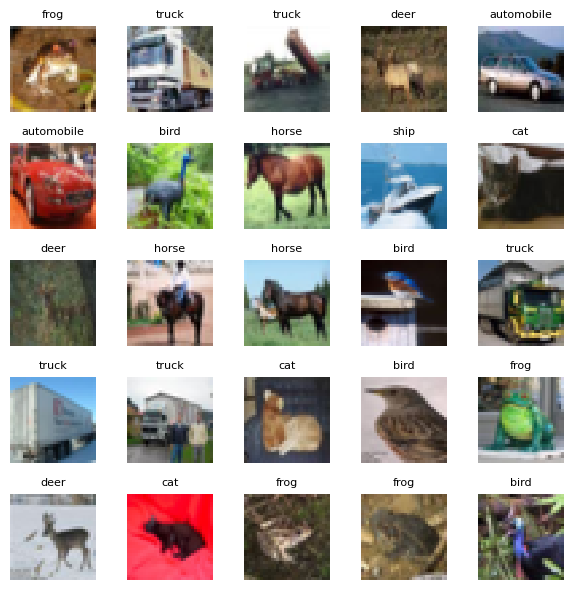

In [13]:
classes = train_data.classes

# Рисуем сетку изображений
fig, axes = plt.subplots(5, 5, figsize=(6, 6))  # 5x5 картинок
for i in range(5):
    for j in range(5):
        idx = i * 5 + j
        img, label = train_data[idx]
        axes[i, j].imshow(img.permute(1, 2, 0), interpolation='nearest')  # Без масштабирования
        axes[i, j].set_title(classes[label], fontsize=8)
        axes[i, j].axis('off')  # Убираем оси

plt.tight_layout()
plt.show()

In [ ]:
# в тренировочную выборку отнесем 80% всех картинок
train_size = int(len(train_data) * 0.8)
# в валидационную — остальные 20%
val_size = len(train_data) - train_size

train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])

In [16]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

torch.Size([64, 3, 32, 32]) torch.Size([64])
tensor(3)
tensor(2)
tensor(8)
tensor([[[0.7255, 0.7059, 0.6824,  ..., 0.6745, 0.6824, 0.6824],
         [0.7137, 0.7098, 0.7294,  ..., 0.6745, 0.6824, 0.6706],
         [0.7294, 0.7373, 0.7451,  ..., 0.6902, 0.6824, 0.6588],
         ...,
         [0.4784, 0.5020, 0.5529,  ..., 0.4039, 0.4745, 0.5255],
         [0.5490, 0.5686, 0.5765,  ..., 0.4157, 0.5059, 0.5176],
         [0.5059, 0.5373, 0.5608,  ..., 0.4706, 0.4980, 0.5255]],

        [[0.5490, 0.5608, 0.5569,  ..., 0.4980, 0.5176, 0.5294],
         [0.5529, 0.5765, 0.6157,  ..., 0.5059, 0.5294, 0.5255],
         [0.5647, 0.6039, 0.6275,  ..., 0.5373, 0.5412, 0.5255],
         ...,
         [0.3765, 0.4157, 0.4588,  ..., 0.2627, 0.3569, 0.4078],
         [0.4588, 0.5020, 0.5020,  ..., 0.3020, 0.4039, 0.4157],
         [0.4392, 0.4824, 0.4941,  ..., 0.3882, 0.4118, 0.4157]],

        [[0.5216, 0.5373, 0.5412,  ..., 0.4235, 0.4549, 0.4824],
         [0.5216, 0.5529, 0.5922,  ..., 0.4431, 

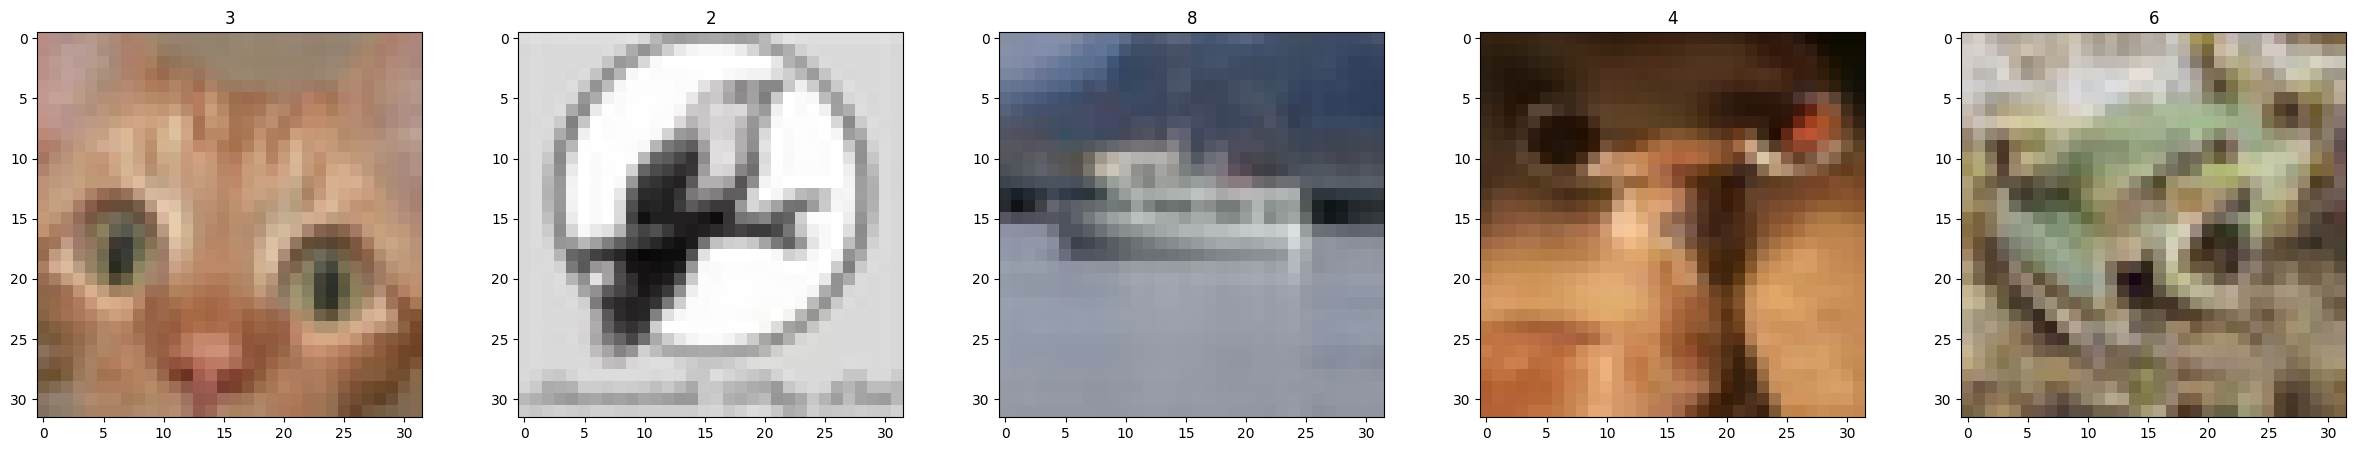

In [27]:
for batch in train_loader:
    # батч картинок и батч ответов к картинкам
    images, labels = batch
    break


print(images.shape, labels.shape)

for l in labels[:3]:
    print(l)

for im in images[:3]:
    print(im)

def show_images(images, labels):
    f, axes= plt.subplots(1, 5, figsize=(30,5))

    for i, axis in enumerate(axes):
        # переводим картинку из тензора в numpy
        img = images[i].numpy()
        # переводим картинку в размерность (длина, ширина, цветовые каналы)
        img = np.transpose(img, (1, 2, 0))

        axes[i].imshow(img)
        axes[i].set_title(labels[i].numpy())

    plt.show()


show_images(images, labels)


In [28]:
# модуль, где определены слои для нейронных сетей
import torch.nn as nn
# модуль, где определены активации для слоев нейронных сетей
import torch.nn.functional as F
# метрика качества
from sklearn.metrics import accuracy_score

In [102]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()

        # размер исходной картинки 32х32
        self.activation = nn.ReLU()

        # conv 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3,3)) #30x30
        # batch norm 1
        self.bn1 = nn.BatchNorm2d(6)
        # pool
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2)) #15x15
        # conv 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=9, kernel_size=(3,3)) #13x13
        # batch norm 2
        self.bn2 = nn.BatchNorm2d(9)

        # flatten
        self.flatten = nn.Flatten()

        # linear 1
        self.fc1 = nn.Linear(13 * 13 * 9, 128)
        # dropout
        self.dropout = nn.Dropout(p=0.3)
        # linear 2
        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
        # forward pass сети

        x = self.activation(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.activation(self.bn2(self.conv2(x)))

        x = self.flatten(x)

        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [103]:
conv_net = ConvNet()

In [104]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_net = conv_net.to(device)
device

device(type='cpu')

In [105]:
# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(conv_net.parameters(), lr=learning_rate)

Спробую додати аугментацію данних

In [106]:

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),        # случайное отражение
    transforms.ToTensor()                     # преобразование в тензор
])

train_data = datasets.CIFAR10(
    root="./data",
    train=True,
    transform=transform_train,
    download=True
)

val_transforms = transforms.Compose([
    transforms.ToTensor(),  # Только приведение к тензору, без аугментаций
])

full_dataset = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=None
)


# 3. Разделим dataset, но transform зададим уже после split'а

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_subset, val_subset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# 4. Переопределим transform для каждой части

train_subset.dataset.transform = transform_train
val_subset.dataset.transform = val_transforms

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)



In [107]:
from IPython.display import clear_output


def evaluate(model, dataloader, loss_fn):

    losses = []

    num_correct = 0
    num_elements = 0

    for i, batch in enumerate(dataloader):

        # так получаем текущий батч
        X_batch, y_batch = batch

        with torch.no_grad():
            logits = model(X_batch.to(device))

            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())

            y_pred = torch.argmax(logits, dim=1).cpu()

            num_correct += torch.sum(y_pred == y_batch)
            num_elements += len(X_batch)

    accuracy = num_correct / num_elements

    return accuracy, np.mean(losses)

def train(model, loss_fn, optimizer, n_epoch=3):

    num_iter = 0

    # массивы, в которые будем сохранять средние значения лосса и accuracy
    # после каждой эпохи обучения
    train_losses = []
    val_losses = []
    train_acc = []
    val_acc = []

    # цикл обучения сети
    for epoch in range(n_epoch):

        print("Epoch:", epoch)

        model.train(True)

        # массивы, в которые будем сохранять значения лосса и accuracy
        # на каждой итерации текущей эпохи
        epoch_train_losses = []
        epoch_train_acc = []

        for i, batch in enumerate(train_loader):
            # так получаем текущий батч
            X_batch, y_batch = batch

            # forward pass (получение ответов на батч картинок)
            logits = model(X_batch.to(device))

            # вычисление лосса от выданных сетью ответов и правильных ответов на батч
            loss = loss_fn(logits, y_batch.to(device))


            loss.backward() # backpropagation (вычисление градиентов)
            optimizer.step() # обновление весов сети
            optimizer.zero_grad() # обнуляем веса

            num_iter += 1
            epoch_train_losses.append(loss.item())

            # вычислим accuracy на текущем train батче
            model_answers = torch.argmax(logits, dim=1).cpu()
            train_accuracy = torch.sum(y_batch == model_answers) / len(y_batch)
            epoch_train_acc.append(train_accuracy)

        # после каждой эпохи получаем метрику качества на валидационной выборке
        model.train(False)

        train_losses.append(np.mean(epoch_train_losses))
        train_acc.append(np.mean(epoch_train_acc))

        val_accuracy, val_loss = evaluate(model, val_loader, loss_fn=loss_fn)
        val_losses.append(val_loss)
        val_acc.append(val_accuracy)

        #########################
        # Отрисовка графика изменения значений лосса и accuracy по эпохам
        # удаляем предыдущую визуализацию
        clear_output(wait=True)

        # визуализируем графики тренировочного и валидационного лоссов и accuracy
        _, axes = plt.subplots(1, 2, figsize=(14, 7))
        axes[0].plot(range(len(train_losses)), train_losses, c='b')
        axes[1].plot(range(len(train_acc)), train_acc, c='b')
        axes[0].plot(range(len(val_losses)), val_losses, c='r')
        axes[1].plot(range(len(val_acc)), val_acc, c='r')
        axes[0].set_title('Loss, epochs done: '+str(epoch))
        axes[1].set_title('Accuracy, epochs done: '+str(epoch))

        plt.show()
        #########################

    return model

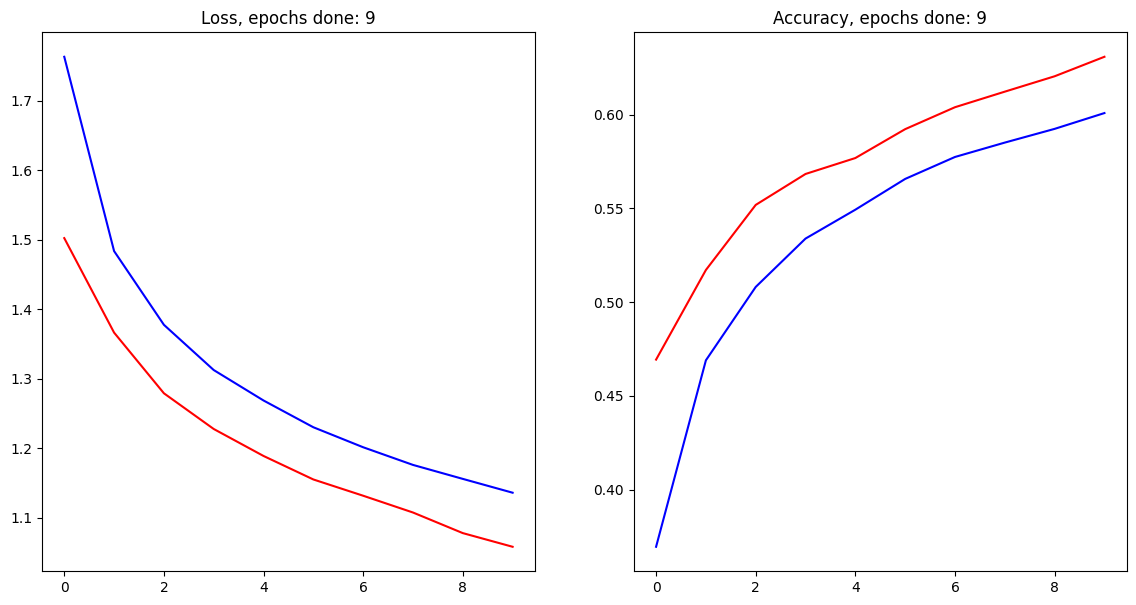

In [108]:
conv_net = train(conv_net, loss_fn, optimizer, n_epoch=10)

In [109]:
train_accuracy, _ = evaluate(conv_net, train_loader, loss_fn)
print('Train accuracy is', train_accuracy)

Train accuracy is tensor(0.6321)


In [110]:
test_accuracy, _ = evaluate(conv_net, test_loader, loss_fn)
print('Test accuracy is', test_accuracy)

Test accuracy is tensor(0.6058)
